# Import Necessary Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Checking Current Directory

In [2]:
import os
print(os.getcwd())


C:\Users\Dell


# Read the train and test data files using pandas

In [2]:
train_data = pd.read_csv("train_data.txt", delimiter=':::', header=None, engine='python')
test_data = pd.read_csv("test_data.txt", delimiter=':::', header=None, engine='python')
test_data_solution = pd.read_csv("test_data_solution.txt", delimiter=':::', header=None, engine='python')

NameError: name 'pd' is not defined

## View train data 

In [5]:
print("shape",train_data.shape)

shape (54214, 4)


In [6]:
train_data.head()

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


## View the test solution data 

In [7]:
print("shape",test_data_solution.shape)

shape (54200, 4)


In [8]:
test_data_solution.head()

,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [9]:
# Concatenate train and test data
df = pd.concat([train_data, test_data_solution])

In [10]:
# Rename columns
df.columns = ["id", "Title", "Genre", "Description"]

In [11]:
# Display the first few rows
print(df.head())

   id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


# Data Cleaning and Preprocessing

## Handling Missing Values

In [12]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
id             0
Title          0
Genre          0
Description    0
dtype: int64


## Text Data Preprocessing

In [13]:
import string

# Lowercase text
df['Description'] = df['Description'].str.lower()

# Remove punctuation
df['Description'] = df['Description'].apply(lambda x: ''.join([c for c in x if c not in string.punctuation]))

# Tokenization (split text into words)
df['Description'] = df['Description'].apply(lambda x: x.split())


## Stopword Removal

In [14]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Description'] = df['Description'].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Lemmatization

In [15]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['Description'] = df['Description'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


## Encoding Categorical Variables

In [16]:
# One-hot encoding for Genre (assuming it's a multi-class classification)
df = pd.get_dummies(df, columns=['Genre'])

## Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

X = df['Description']
y = df.drop(['id', 'Title', 'Description'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
df.head()

,id,Title,Description,Genre_ action,Genre_ adult,Genre_ adventure,Genre_ animation,Genre_ biography,Genre_ comedy,Genre_ crime,...,Genre_ news,Genre_ reality-tv,Genre_ romance,Genre_ sci-fi,Genre_ short,Genre_ sport,Genre_ talk-show,Genre_ thriller,Genre_ war,Genre_ western
0,1,Oscar et la dame rose (2009),"[listening, conversation, doctor, parent, 10ye...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Cupid (1997),"[brother, sister, past, incestuous, relationsh...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,"Young, Wild and Wonderful (1980)","[bus, empty, student, field, trip, museum, nat...",0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,The Secret Sin (1915),"[help, unemployed, father, make, end, meet, ed...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,The Unrecovered (2007),"[film, title, refers, unrecovered, body, groun...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Visualization

## Histograms and Bar Charts

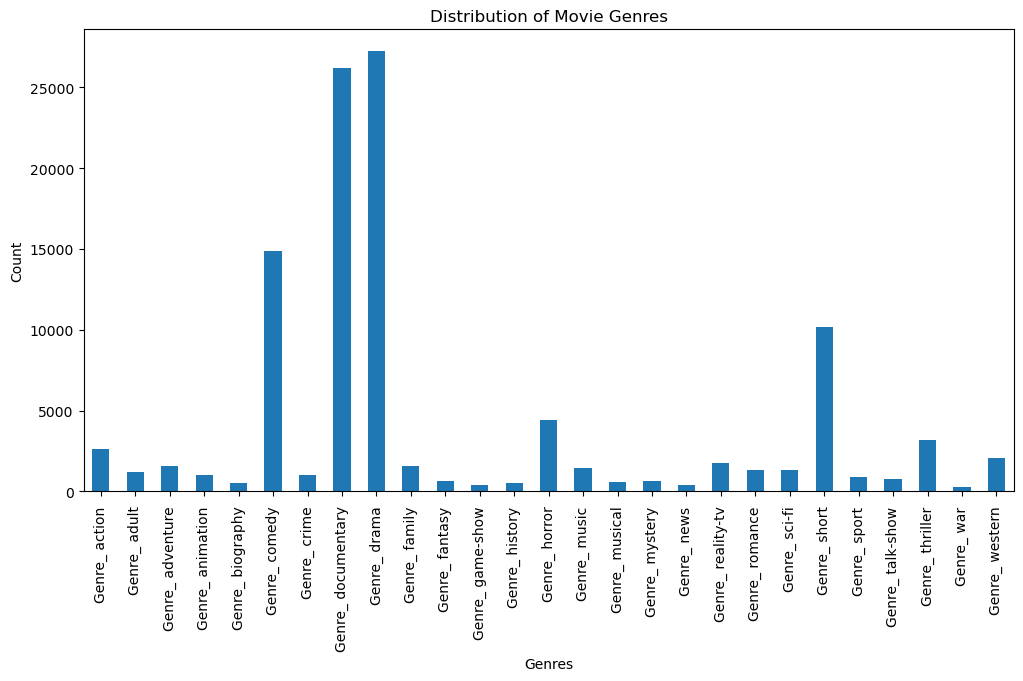

In [24]:
import matplotlib.pyplot as plt

# Extracting genre columns for analysis
genre_columns = df.columns[3:]  # Selecting columns related to movie genres

# Calculating genre counts for visualization
genre_counts = df[genre_columns].sum()

# Creating a bar chart to visualize the distribution of movie genres
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


## Word Clouds (Common Words in Descriptions)

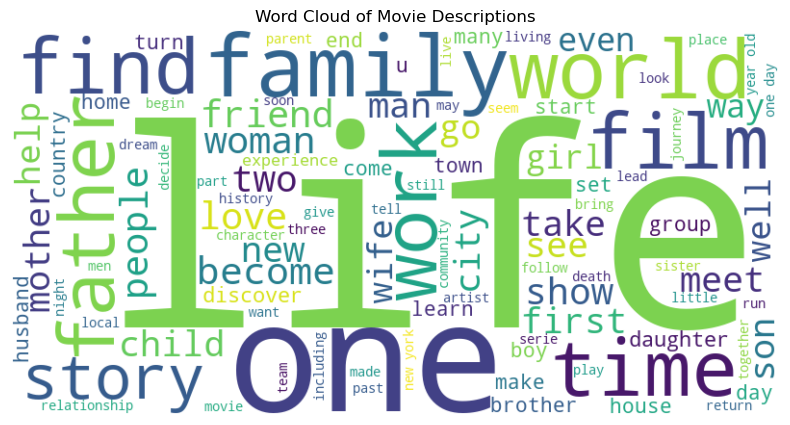

In [27]:
from wordcloud import WordCloud

# Combine all descriptions into a single text
all_descriptions = ' '.join([' '.join(desc) for desc in df['Description']])

# Generate and display a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_descriptions)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Descriptions')
plt.show()

# Feature Engineering

In [37]:
# Create a new feature: Word Count
df['Word_Count'] = df['Description'].apply(lambda x: len(x))

# Create a new feature: Average Word Length
df['Avg_Word_Length'] = df['Description'].apply(lambda x: sum(len(word) for word in x) / len(x))

# Create binary features for the presence of keywords
keywords = ['action', 'adventure', 'comedy', 'drama', 'romance']  # Replace with relevant keywords
for keyword in keywords:
    df[f'Has_{keyword}_Keyword'] = df['Description'].apply(lambda x: keyword in x).astype(int)

# Display the updated DataFrame with new features
df.head()


,id,Title,Description,Genre_ action,Genre_ adult,Genre_ adventure,Genre_ animation,Genre_ biography,Genre_ comedy,Genre_ crime,...,Genre_ war,Genre_ western,Description_Length,Word_Count,Avg_Word_Length,Has_action_Keyword,Has_adventure_Keyword,Has_comedy_Keyword,Has_drama_Keyword,Has_romance_Keyword
0,1,Oscar et la dame rose (2009),"[listening, conversation, doctor, parent, 10ye...",0,0,0,0,0,0,0,...,0,0,51,51,6.313725,0,0,0,0,0
1,2,Cupid (1997),"[brother, sister, past, incestuous, relationsh...",0,0,0,0,0,0,0,...,0,0,15,15,6.866667,0,0,0,0,0
2,3,"Young, Wild and Wonderful (1980)","[bus, empty, student, field, trip, museum, nat...",0,1,0,0,0,0,0,...,0,0,57,57,5.789474,0,0,0,0,0
3,4,The Secret Sin (1915),"[help, unemployed, father, make, end, meet, ed...",0,0,0,0,0,0,0,...,0,0,108,108,5.750000,0,0,0,0,0
4,5,The Unrecovered (2007),"[film, title, refers, unrecovered, body, groun...",0,0,0,0,0,0,0,...,0,0,57,57,6.403509,0,0,0,0,0


# Model Selection & Training

In [46]:
column_names = df.columns
print(column_names)


Index(['id', 'Title', 'Description', 'Genre_ action ', 'Genre_ adult ',
       'Genre_ adventure ', 'Genre_ animation ', 'Genre_ biography ',
       'Genre_ comedy ', 'Genre_ crime ', 'Genre_ documentary ',
       'Genre_ drama ', 'Genre_ family ', 'Genre_ fantasy ',
       'Genre_ game-show ', 'Genre_ history ', 'Genre_ horror ',
       'Genre_ music ', 'Genre_ musical ', 'Genre_ mystery ', 'Genre_ news ',
       'Genre_ reality-tv ', 'Genre_ romance ', 'Genre_ sci-fi ',
       'Genre_ short ', 'Genre_ sport ', 'Genre_ talk-show ',
       'Genre_ thriller ', 'Genre_ war ', 'Genre_ western ',
       'Description_Length', 'Word_Count', 'Avg_Word_Length',
       'Has_action_Keyword', 'Has_adventure_Keyword', 'Has_comedy_Keyword',
       'Has_drama_Keyword', 'Has_romance_Keyword'],
      dtype='object')


## Importing necessary libraries for model selection and training

In [47]:
# Importing necessary libraries for model selection and training
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
